In [19]:
import torch
import matplotlib.pyplot as plt
from clustpy.data import load_fmnist, load_mnist, load_reuters, load_usps
from clustpy.deep.autoencoders import FeedforwardAutoencoder
import random
import numpy as np

In [28]:
dataset = load_mnist()
data = dataset["data"]
labels = dataset["target"]
print(data.shape)
print(labels.shape)
autoencoder1 = FeedforwardAutoencoder(layers=[data.shape[1], 500, 500, 2000, 10])
autoencoder1.load_state_dict(torch.load("./pretrained_autoencoders/MNIST_autoencoder_pretrained.pth")) 
autoencoder2 = FeedforwardAutoencoder(layers=[data.shape[1], 500, 500, 2000, 10])
autoencoder2.load_state_dict(torch.load("./pretrained_AE.pth")) 


(70000, 784)
(70000,)


<All keys matched successfully>

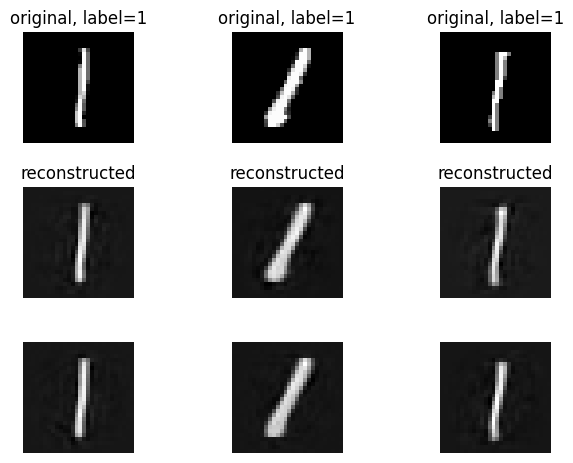

In [39]:

number_samples = 3
fig, ax = plt.subplots(3, number_samples)
fig.tight_layout()
ax = ax.flatten()
for i, index in enumerate(sorted(random.sample(range(data.shape[0]),number_samples))):
    # use this output in some way
    img = data[index]
    if img.ndim == 1:
        img = np.expand_dims(img,0)
    img_rec1 = autoencoder1.decode(autoencoder1.encode(torch.from_numpy(img))).detach().numpy()
    img_rec2 = autoencoder2.decode(autoencoder2.encode(torch.from_numpy(img))).detach().numpy()
    ax[i].imshow(img.reshape(28,28), cmap='gray')
    ax[i+number_samples].imshow(img_rec1.reshape(28,28), cmap='gray')
    ax[i+2*number_samples].imshow(img_rec2.reshape(28,28), cmap='gray')
    ax[i].set_title(f'original, label={labels[index]}')
    ax[i+number_samples].set_title(f'reconstructed')
    ax[i].set_axis_off()
    ax[i+number_samples].set_axis_off()
    ax[i+2*number_samples].set_axis_off()
    